# UK Property Image Classification EDA

---

#### Problem statement:
Building a convoluated neural network to classify period and modern residential buildings in UK

#### Data:
Images of residential buildings from public domains. Around 1000 images for each class

#### Model:
Convoluted Neural Nets

#### Initial model results:
The model validation accuracy is 80%, compared to a base case of 50%. 200 images are used in the initial model training

#### Further research:
- Early stopping
- Dropouts
- Transfer learning

### Importing libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from math import ceil

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from skimage import io
from skimage import color
from skimage.transform import rescale, resize, downscale_local_mean

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
# For reproducibility
np.random.seed(42)

#### Load the first part of training data - old

In [4]:
# function to load folder into arrays and  then it returns that same array

def load_files(path):
    # Put files into lists and return them as one list of size 4
    image_files = os.listdir(path)
    return image_files

In [5]:
# get image resolution

def get_resolution(image_path, image_files):
    file_info = {}
    i = 0

    for file in image_files:
        image_link = image_path + file
        img = io.imread(image_link)
        file_info[i] = {"image_link": image_link ,"row": img.shape[0], "col": img.shape[1]}
        i += 1

    df_file_info = pd.DataFrame.from_dict(file_info, orient="index")

    # getting the lowest value of row/column
    min_row = min(df_file_info["row"])
    min_col = min(df_file_info["col"])
    min_size = min(min_row, min_col)
    
    return df_file_info, min_size


In [6]:
# feeding images into numpy ndarray

def load_array(image_files, min_size):
    X = np.array([])
    for file in image_files:
        img = io.imread(image_path + file)
        img_resized = resize(img, (min_size,min_size), anti_aliasing=True)
        if X.shape[0] == 0:
            X = np.array([img_resized])
        else:
            X = np.append(X, [img_resized], axis = 0)
    return X



In [7]:
# Photos of old or period buildings

image_path = "../images/old_samples/"
image_files = load_files(image_path)

# look through the resolution of image files
df_file_info, min_size = get_resolution(image_path, image_files)
print(f"df_file_info = {df_file_info.head(10)}")
print(f"min_size = {min_size}")

# set min_size = 400
min_size = 400

X_old = load_array(image_files, min_size)

# y value is zero for old buildings
y_old = np.zeros((len(image_files),1))

print(f"X_old shape = {X_old.shape}")
print(f"y_old shape = {y_old.shape}")

c:\python37\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


df_file_info =                                         image_link  row  col
0  ../images/old_samples/photo-14610337-AfvlL7.jpg  430  645
1  ../images/old_samples/photo-14613473-oJlAGk.jpg  437  656
2  ../images/old_samples/photo-14613600-uzDqQq.jpg  437  655
3  ../images/old_samples/photo-14614603-V4bv1O.jpg  437  656
4  ../images/old_samples/photo-14615502-8O2X6l.jpg  437  655
5  ../images/old_samples/photo-14616168-5TpyI2.jpg  437  655
6  ../images/old_samples/photo-14617955-V4dZxr.jpg  437  655
7  ../images/old_samples/photo-14618127-QvlsAy.jpg  437  583
8  ../images/old_samples/photo-14622750-kpCpOD.jpg  437  655
9  ../images/old_samples/photo-14629155-jC4lQF.jpg  437  583
min_size = 393


c:\python37\lib\site-packages\PIL\TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


X_old shape = (100, 400, 400, 3)
y_old shape = (100, 1)


In [8]:
df_y_old = pd.DataFrame(y_old, columns=["label"])
df_y_old["image_link"] = df_file_info["image_link"]
print(df_y_old.shape)

(100, 2)


In [9]:
# Photos of modern buildings

image_path = "../images/modern_samples/"
image_files = load_files(image_path)

# look through the resolution of image files
df_file_info, min_size = get_resolution(image_path, image_files)
print(f"df_file_info = {df_file_info.head(10)}")
print(f"min_size = {min_size}")

# set min_size = 400
min_size = 400

X_modern = load_array(image_files, min_size)

# y value is one for old buildings
y_modern = np.ones((len(image_files),1))

print(f"X_modern shape = {X_modern.shape}")
print(f"y_modern shape = {y_modern.shape}")

df_file_info =                                           image_link  row  col
0  ../images/modern_samples/photo-14607856-PBTR2E...  437  655
1  ../images/modern_samples/photo-14607975-aH71tJ...  437  655
2  ../images/modern_samples/photo-14608672-cQhyQn...  437  655
3  ../images/modern_samples/photo-14608758-AyTNmO...  437  655
4  ../images/modern_samples/photo-14608761-kbFlFq...  437  655
5  ../images/modern_samples/photo-14608783-tzihI0...  437  655
6  ../images/modern_samples/photo-14608813-s1oh3M...  437  655
7  ../images/modern_samples/photo-14608847-faGZhH...  437  655
8  ../images/modern_samples/photo-14608874-1V4vk5...  437  655
9  ../images/modern_samples/photo-14608917-jZxREQ...  437  655
min_size = 319
X_modern shape = (100, 400, 400, 3)
y_modern shape = (100, 1)


In [10]:
df_y_modern = pd.DataFrame(y_modern, columns=["label"])
df_y_modern["image_link"] = df_file_info["image_link"]
print(df_y_modern.shape)

(100, 2)


In [11]:
X = np.append(X_old, X_modern, axis = 0)
X.shape

(200, 400, 400, 3)

In [12]:
df_y = pd.concat([df_y_old, df_y_modern])
df_y.reset_index(drop=True, inplace=True)
df_y["id"] = df_y.index
print(df_y.shape)
df_y.tail(10)

(200, 3)


,label,image_link,id
190,1.0,../images/modern_samples/photo-14629694-C2BBtn...,190
191,1.0,../images/modern_samples/photo-14629729-2OaezP...,191
192,1.0,../images/modern_samples/photo-14629740-FCsmI8...,192
193,1.0,../images/modern_samples/photo-14629764-jdoNsE...,193
194,1.0,../images/modern_samples/photo-14629831-avPdYJ...,194
195,1.0,../images/modern_samples/photo-14719202-ut580g...,195
196,1.0,../images/modern_samples/photo-14719210-PmuY1E...,196
197,1.0,../images/modern_samples/photo-14719418-5WVSys...,197
198,1.0,../images/modern_samples/photo-14720254-KL17FJ...,198
199,1.0,../images/modern_samples/photo-14721627-h6qgKY...,199


#### Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, stratify=df_y["label"])

In [14]:
y_train.shape

(150, 3)

In [15]:
# Baseline accuracy - 50%
y_train['label'].value_counts()

1.0    75
0.0    75
Name: label, dtype: int64

In [16]:
y_test['label'].value_counts()

0.0    25
1.0    25
Name: label, dtype: int64

In [17]:
y_test['id'][:10]

102    102
164    164
195    195
60      60
32      32
29      29
86      86
140    140
94      94
134    134
Name: id, dtype: int64

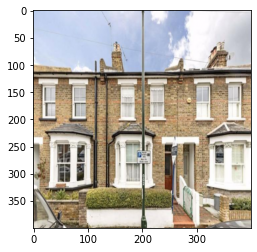

In [18]:
plt.imshow(X_train[0])

#### Standard Scaler

In [19]:
## flatten X_train to feed it into Standard Scaler
X_train.shape

(150, 400, 400, 3)

In [20]:
X_train[0][:5]

array([[[0.72561376, 0.79228042, 0.90992748],
        [0.7254902 , 0.79215686, 0.90980392],
        [0.72559789, 0.79226455, 0.90991161],
        ...,
        [0.88674494, 0.89066651, 0.90635279],
        [0.88289706, 0.88681863, 0.9025049 ],
        [0.88289706, 0.88681863, 0.9025049 ]],

       [[0.7283352 , 0.79500187, 0.91264893],
        [0.72603431, 0.79270098, 0.91034804],
        [0.72803968, 0.79470634, 0.9123534 ],
        ...,
        [0.89372549, 0.89764706, 0.91333333],
        [0.89137325, 0.89529482, 0.9109811 ],
        [0.89085294, 0.89477451, 0.91046078]],

       [[0.73031863, 0.79698529, 0.91463235],
        [0.73031863, 0.79698529, 0.91463235],
        [0.73031863, 0.79698529, 0.91463235],
        ...,
        [0.88137255, 0.88529412, 0.90098039],
        [0.87891222, 0.88283379, 0.89852007],
        [0.87602941, 0.87995098, 0.89563725]],

       [[0.73419825, 0.80086492, 0.91851198],
        [0.73333333, 0.8       , 0.91764706],
        [0.73408716, 0.80075383, 0.

#### Image already in the scale of 0-1

In [21]:
X_train_flat = X_train.flatten().reshape(-1,1)
X_train_flat.shape

(72000000, 1)

In [22]:
X_test_flat = X_test.flatten().reshape(-1,1)
X_test_flat.shape

(24000000, 1)

In [23]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train_flat).reshape(X_train.shape)
X_test_ss = ss.transform(X_test_flat).reshape(X_test.shape)

### First trial of model

In [24]:
# Instantiate a CNN.
cnn_model = Sequential()

In [25]:
# Add a convolutional layer.

cnn_model.add(Conv2D(filters = 6,            # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(min_size,min_size,3))) # shape of input (image)

In [26]:
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling
cnn_model.add(Conv2D(16,
                     kernel_size=3,
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [27]:
cnn_model.add(Flatten())

In [28]:
# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

In [29]:
# Add a final layer with 2 neurons.
cnn_model.add(Dense(1, activation='sigmoid'))

In [30]:
# Compile model
cnn_model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [31]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 398, 6)       168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 199, 199, 6)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 197, 197, 16)      880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               19669120  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [32]:
# early stop, drop out to investigate

In [33]:
# Fit model on training data
history = cnn_model.fit(X_train_ss,
                        y_train['label'],
                        batch_size=64,
                        validation_data=(X_test_ss, y_test['label']),
                        epochs=30,
                        verbose=1)

Epoch 1/30
3/3 [==============================] - 16s 3s/step - loss: 9.6730 - accuracy: 0.4980 - val_loss: 52.7730 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 6s 2s/step - loss: 29.2429 - accuracy: 0.5804 - val_loss: 42.2955 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 6s 2s/step - loss: 35.6449 - accuracy: 0.4727 - val_loss: 20.2485 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 8.2786 - accuracy: 0.6463 - val_loss: 12.5198 - val_accuracy: 0.5400
Epoch 5/30
3/3 [==============================] - 6s 2s/step - loss: 8.8101 - accuracy: 0.5986 - val_loss: 9.9051 - val_accuracy: 0.5600
Epoch 6/30
3/3 [==============================] - 6s 2s/step - loss: 2.6783 - accuracy: 0.8014 - val_loss: 4.9737 - val_accuracy: 0.7800
Epoch 7/30
3/3 [==============================] - 6s 2s/step - loss: 1.6900 - accuracy: 0.8747 - val_loss: 9.0197 - val_accuracy: 0.6200
Epoch 8/30
3/3 [==================

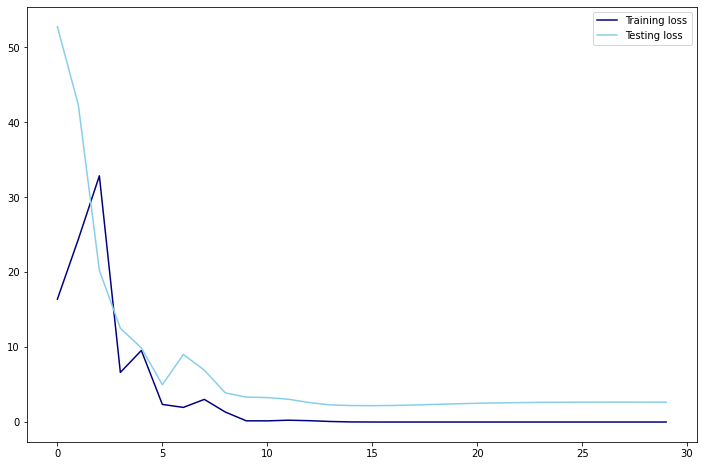

In [34]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']
plt.figure(figsize=(12, 8))
plt.plot(train_loss, label='Training loss', color='navy')
plt.plot(test_loss, label='Testing loss', color='skyblue')
plt.legend();

In [35]:
# List out the images of misclassification
cnn_score = cnn_model.evaluate(X_test_ss, y_test['label'], verbose=1)

2/2 [==============================] - 1s 254ms/step - loss: 2.6520 - accuracy: 0.7800


In [36]:
y_pred = cnn_model.predict(X_test_ss)
y_pred.round()[:10]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [37]:
y_test['pred'] = y_pred.round()
y_test[:10]

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,label,image_link,id,pred
102,1.0,../images/modern_samples/photo-14608672-cQhyQn...,102,1.0
164,1.0,../images/modern_samples/photo-14622348-JugCDq...,164,1.0
195,1.0,../images/modern_samples/photo-14719202-ut580g...,195,0.0
60,0.0,../images/old_samples/photo-14682479-ifuEuC.jpg,60,0.0
32,0.0,../images/old_samples/photo-14648837-VQIw0s.jpg,32,0.0
29,0.0,../images/old_samples/photo-14643904-FQGfj2.jpg,29,0.0
86,0.0,../images/old_samples/photo-14711543-iBR3Mw.jpg,86,1.0
140,1.0,../images/modern_samples/photo-14614979-DWcVcE...,140,0.0
94,0.0,../images/old_samples/photo-14718546-koLG8i.jpg,94,0.0
134,1.0,../images/modern_samples/photo-14614883-NpHaCX...,134,1.0


In [38]:
# count the number of photos misclassified in y_test
y_test_misclassified = y_test[["image_link", "label", "pred"]][y_test["label"] != y_test["pred"]]
print(f"misclassified in y_test: {y_test_misclassified.shape[0]}")
y_test_misclassified

# show the first 10 photos misclassified in y_test
display_no = min(10, y_test_misclassified.shape[0])

misclassified in y_test: 11


In [39]:
y_test_misclassified.head()

,image_link,label,pred
195,../images/modern_samples/photo-14719202-ut580g...,1.0,0.0
86,../images/old_samples/photo-14711543-iBR3Mw.jpg,0.0,1.0
140,../images/modern_samples/photo-14614979-DWcVcE...,1.0,0.0
172,../images/modern_samples/photo-14622577-aIHKTO...,1.0,0.0
107,../images/modern_samples/photo-14608847-faGZhH...,1.0,0.0


../images/modern_samples/photo-14719202-ut580g.jpg


Text(0.5, 1.0, 'label:1.0, pred:0.0')

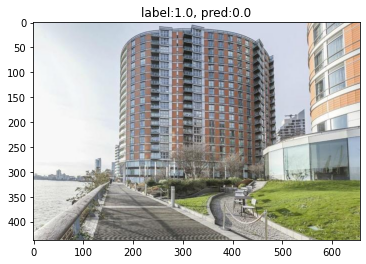

In [46]:
image_link = y_test_misclassified.loc[195, "image_link"]
print(image_link)
plt.imshow(io.imread(image_link))

plt.title("label:" + str(y_test_misclassified.loc[195, "label"]) + ", pred:" + str(y_test_misclassified.loc[195, "pred"]))

10


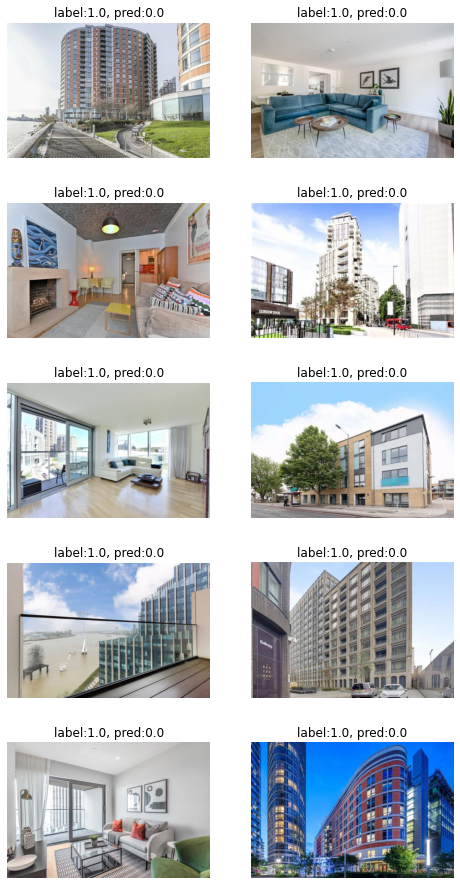

In [87]:
fig, ax = plt.subplots(ceil(display_no/2), 2, figsize=(8,16))
#fig.suptitle("Missclassifications")
j=0
for i in y_test_misclassified.index[:display_no]:
    row = j//2
    col = j%2
    image_link = y_test_misclassified.loc[i, "image_link"]
    ax[row][col].imshow(io.imread(image_link))
    ax[row][col].set_title("label:" + str(y_test_misclassified.loc[195, "label"]) + ", pred:" + str(y_test_misclassified.loc[195, "pred"]))
    ax[row][col].axis('off')
    j += 1

print(j)